In [1]:
!pip install ultralyticsplus==0.0.28 ultralytics==8.0.43


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=c87b5729dd6b550c21b71dbc4dc201b6edf1d77bd6e37c7e2d58405e63d6fbdf
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [2]:
from ultralyticsplus import YOLO, render_result
from PIL import Image

# load model
model = YOLO('foduucom/plant-leaf-detection-and-classification')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
# - Purpose: The confidence threshold determines the minimum confidence level
# a detection must have to be considered valid.
# - Details: For each detected object, YOLO outputs a confidence score indicating
# how certain it is that an object has been correctly identified. Setting a
# threshold of 0.25 means that only detections with a confidence score of 25% or
# higher will be kept. Detections with lower confidence scores will be discarded.
# - Effect: Lowering this value will allow more detections but may introduce more
# false positives (objects detected with lower confidence). Raising it will result
# in fewer, more confident detections, potentially missing objects with lower confidence scores.

model.overrides['iou'] = 0.45  # NMS IoU threshold
# - Purpose: The Intersection over Union (IoU) threshold is used to control Non-Maximum
# Suppression (NMS), a process that removes overlapping detections of the same object.
# - Details: When two or more detections overlap significantly (based on the IoU threshold),
# NMS keeps only the detection with the highest confidence score and discards the others. The
# IoU value is calculated by comparing the overlap area of bounding boxes. Setting iou = 0.45 means
# that if the overlap between two bounding boxes is greater than 45%, the lower-confidence box will be removed.
# - Effect: A lower IoU threshold (e.g., 0.3) will discard more overlapping boxes, potentially
# eliminating correct detections that are close to each other. A higher IoU threshold (e.g., 0.6)
# will retain more overlapping detections, which can result in multiple detections of the same object.

model.overrides['agnostic_nms'] = False  # NMS class-agnostic
# - Purpose: This setting controls whether Non-Maximum Suppression considers class labels when removing overlapping detections.
# - Details: When agnostic_nms is set to False, NMS will only remove overlapping detections if they belong to the same class. If set to True, NMS will treat all detections as the same class, removing overlapping detections regardless of class label.
# - Effect: Setting agnostic_nms to True can be useful in cases where the model detects multiple classes close together, such as when objects of different classes overlap. However, it may lead to false positives if objects of different classes are mistakenly suppressed.

model.overrides['max_det'] = 1000  # maximum number of detections per image
# - Purpose: This parameter sets an upper limit on the total number of objects that can be detected in a single image.
# - Details: max_det is useful when working with scenes that may contain many detectable objects (e.g., crowd scenes or dense foliage). Setting a high value like 1000 allows the model to detect up to 1000 objects in one image.
# - Effect: Setting a high max_det value increases the number of detections but can slow down inference and lead to more overlapping detections. Lowering max_det (e.g., to 100 or 200) can speed up inference but may cause the model to miss objects if the scene is dens

# Print all class names with their IDs
print("Class IDs and names:")
for class_id, class_name in model.names.items():
    print(f"ID: {class_id}, Name: {class_name}")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

Class IDs and names:
ID: 0, Name: ginger
ID: 1, Name: banana
ID: 2, Name: tobacco
ID: 3, Name: ornamaental
ID: 4, Name: rose
ID: 5, Name: soyabean
ID: 6, Name: papaya
ID: 7, Name: garlic
ID: 8, Name: raspberry
ID: 9, Name: mango
ID: 10, Name: cotton
ID: 11, Name: corn
ID: 12, Name: pomgernate
ID: 13, Name: strawberry
ID: 14, Name: Blueberry
ID: 15, Name: brinjal
ID: 16, Name: potato
ID: 17, Name: wheat
ID: 18, Name: olive
ID: 19, Name: rice
ID: 20, Name: lemon
ID: 21, Name: cabbage
ID: 22, Name: gauava
ID: 23, Name: chilli
ID: 24, Name: capcicum
ID: 25, Name: sunflower
ID: 26, Name: cherry
ID: 27, Name: cassava
ID: 28, Name: apple
ID: 29, Name: tea
ID: 30, Name: sugarcane
ID: 31, Name: groundnut
ID: 32, Name: weed
ID: 33, Name: peach
ID: 34, Name: coffee
ID: 35, Name: cauliflower
ID: 36, Name: tomato
ID: 37, Name: onion
ID: 38, Name: gram
ID: 39, Name: chiku
ID: 40, Name: jamun
ID: 41, Name: castor
ID: 42, Name: pea
ID: 43, Name: cucumber
ID: 44, Name: grape
ID: 45, Name: cardamom


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load



image 1/1 /content/sample_data/test1.png: 448x640 1 banana, 385.7ms
Speed: 0.9ms preprocess, 385.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Predicted leaf name: banana
Confidence: tensor([0.91921])
Bounding box coordinates: tensor([[ 35.,  61., 556., 351.]])
Class ID: tensor([1.])
---


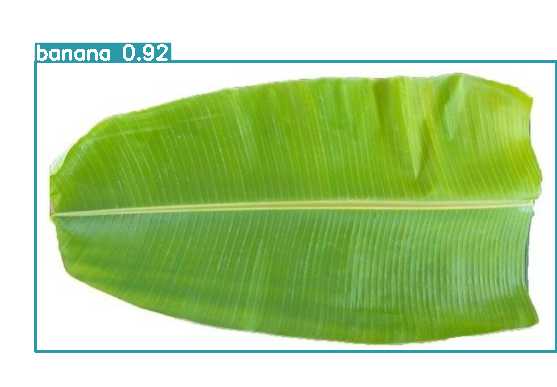

' output when image was test2.png, which was actually rose leaf\n\nUltralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU\nModel summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs\n\nimage 1/1 /content/sample_data/test2.png: 448x640 1 sunflower, 466.6ms\nSpeed: 8.5ms preprocess, 466.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)\nPredicted leaf name: sunflower\nConfidence: tensor([0.47922])\nBounding box coordinates: tensor([[ 22.,   6., 209., 135.]])\nClass ID: tensor([25.])\n---\n'

In [6]:
# set image
image = '/content/sample_data/test1.png' #This was actually banana leaf
# image = '/content/sample_data/test2.png' #This was actually rose leaf

# perform inference
results = model.predict(image)

# Print the name of each leaf predicted and associated metrics
for box in results[0].boxes:
    # Print the predicted class name
    leaf_name = model.names[int(box.cls)]
    print("Predicted leaf name:", leaf_name)

    # Print associated metrics
    print("Confidence:", box.conf)
    print("Bounding box coordinates:", box.xyxy)  # (x1, y1, x2, y2)
    print("Class ID:", box.cls)
    print("---")

# Render the result
rendered_image = render_result(model=model, image=image, result=results[0])

# Save the rendered image
output_path = '/content/rendered_image.png'
rendered_image.save(output_path)

# Display the image using PIL
display(Image.open(output_path))
""" output when image was test1.png, which was actually banana leaf

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/sample_data/test1.png: 448x640 1 banana, 502.7ms
Speed: 7.7ms preprocess, 502.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted leaf name: banana
Confidence: tensor([0.91921])
Bounding box coordinates: tensor([[ 35.,  61., 556., 351.]])
Class ID: tensor([1.])
---
"""

""" output when image was test2.png, which was actually rose leaf

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/sample_data/test2.png: 448x640 1 sunflower, 466.6ms
Speed: 8.5ms preprocess, 466.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Predicted leaf name: sunflower
Confidence: tensor([0.47922])
Bounding box coordinates: tensor([[ 22.,   6., 209., 135.]])
Class ID: tensor([25.])
---
"""